# `20180721a` - Tests for TGC and pyUn0 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.interpolate import griddata
import math
from scipy.signal import decimate, convolve
import json 
import re
import glob, os
import sys
import pyexiv2
import os
from pyUn0 import * 

Not loading RPi.GPIO as not on RPi


## Creating the set of acquisitions

data/20180721a-7.json


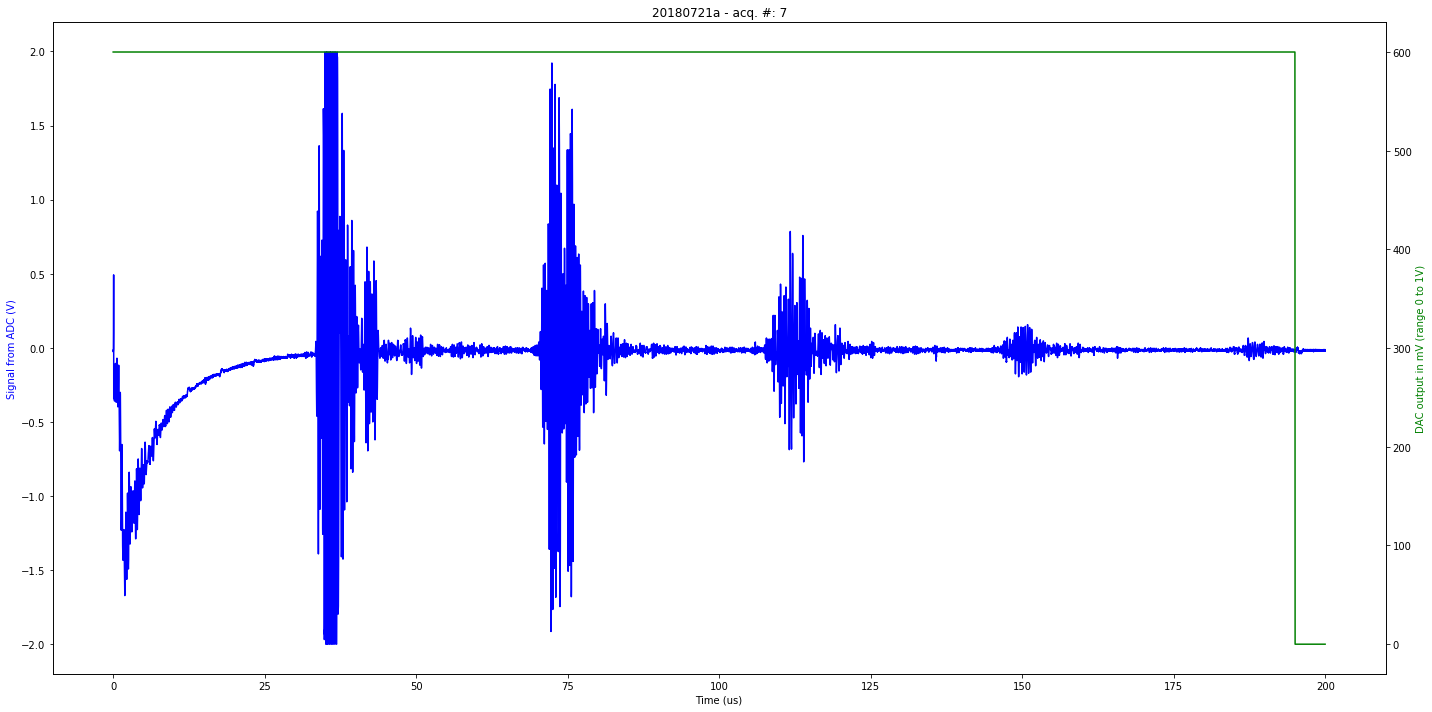

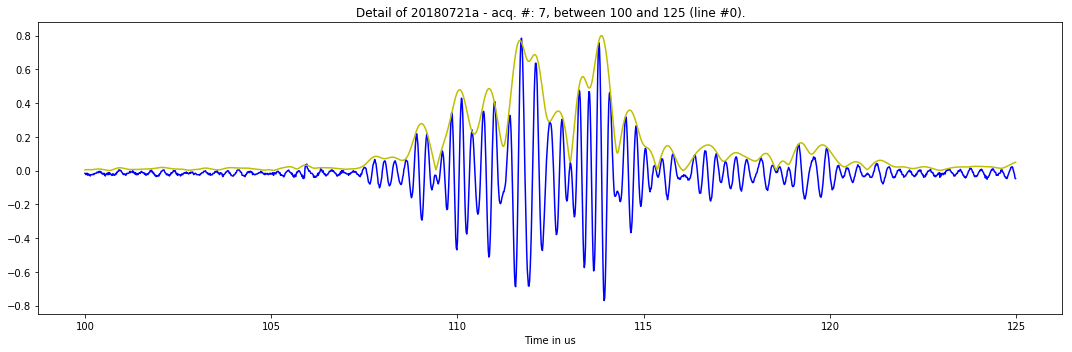

51
data/20180721a-1.json


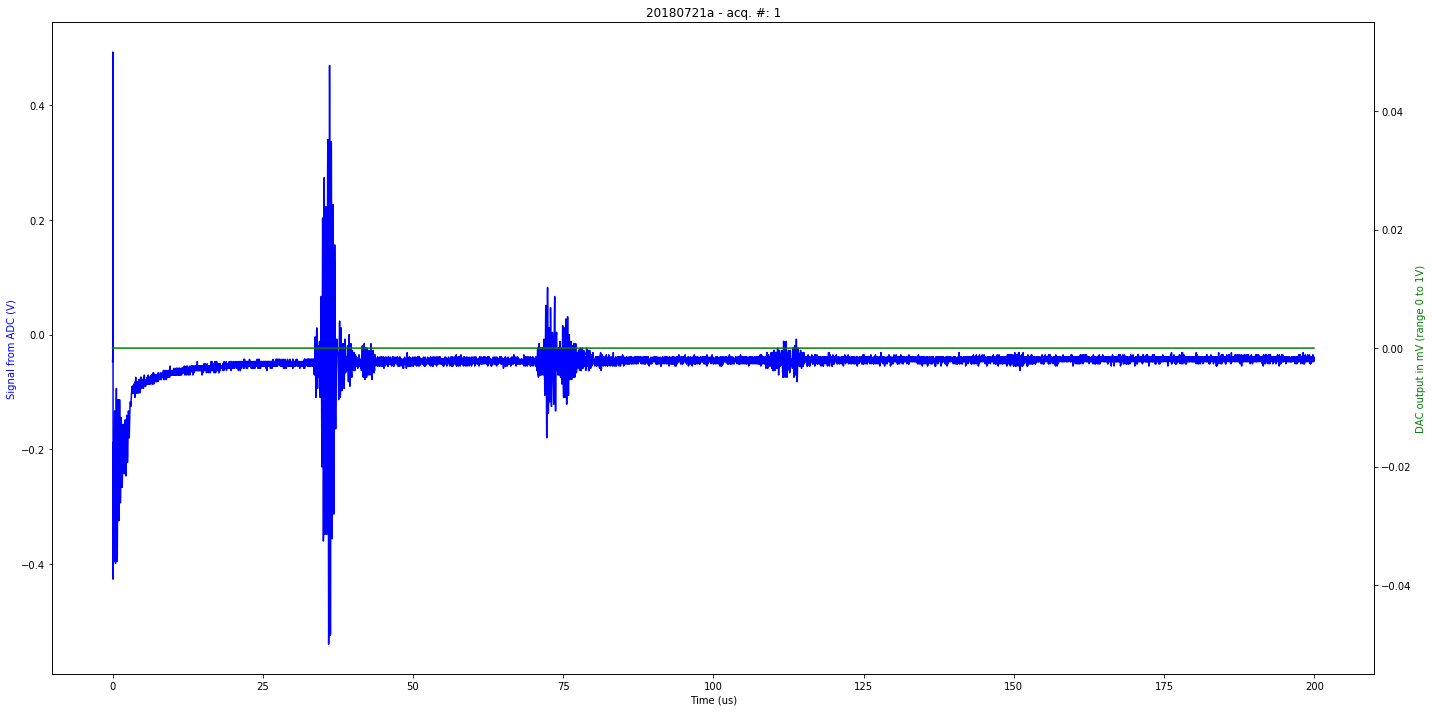

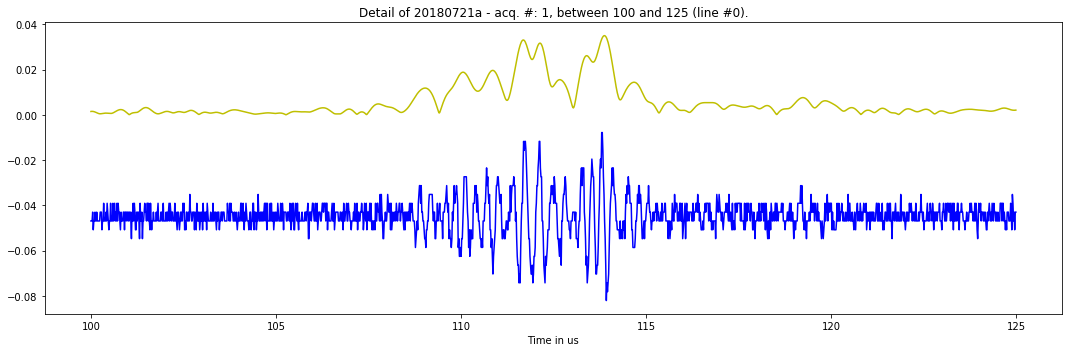

51
data/20180721a-3.json


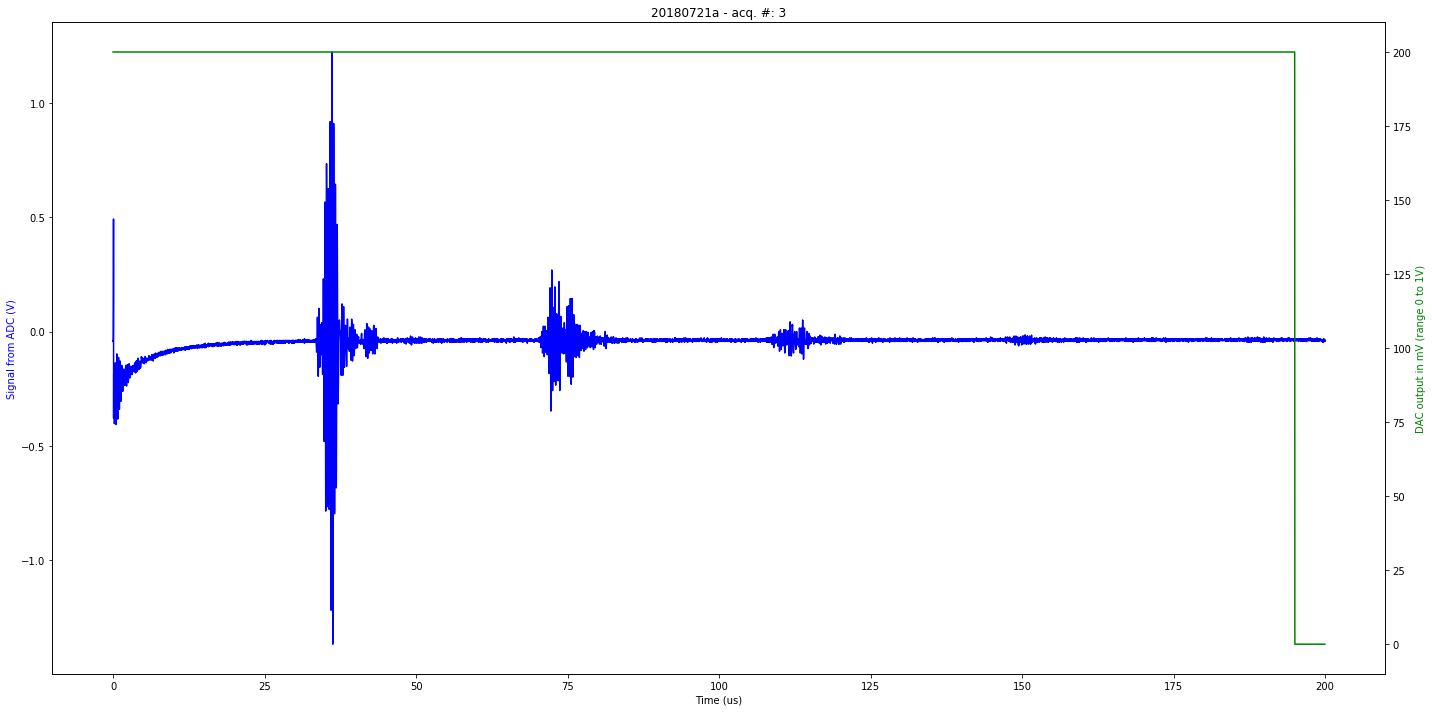

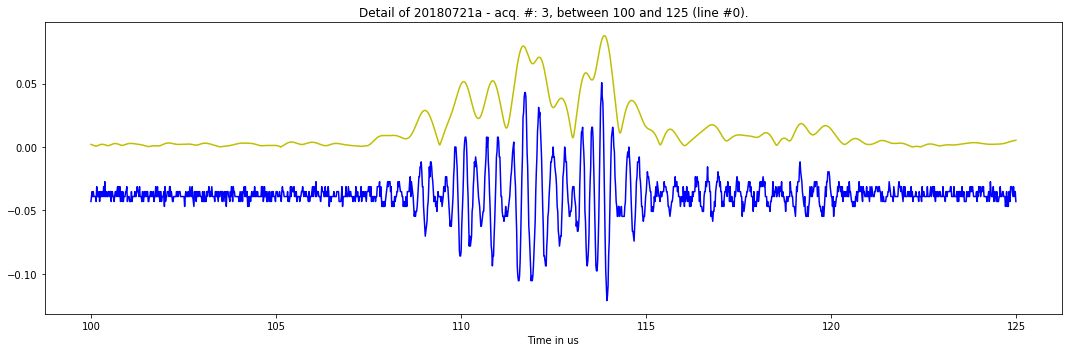

51
data/20180721a-2.json


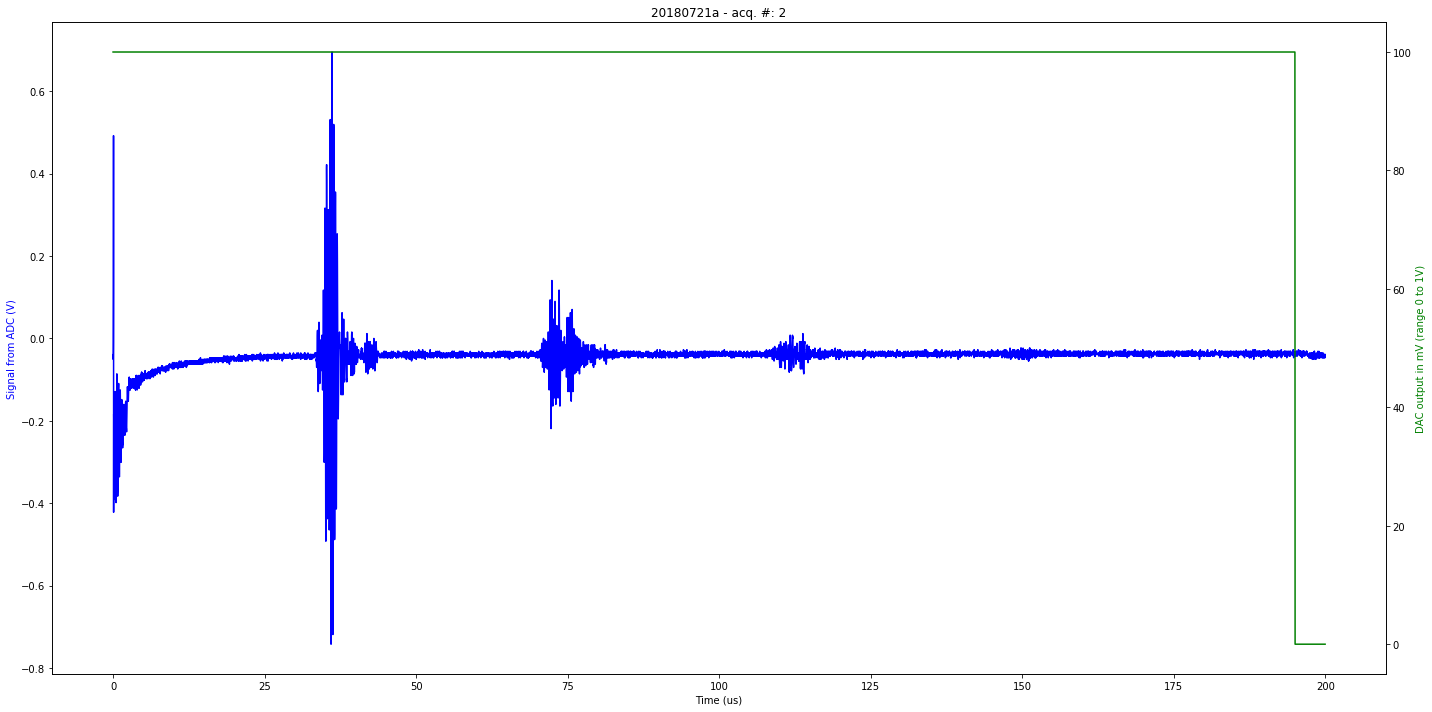

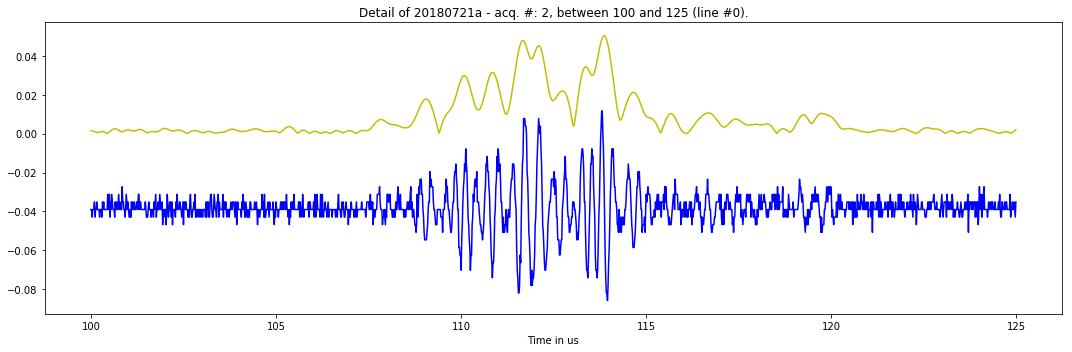

51
data/20180721a-11.json


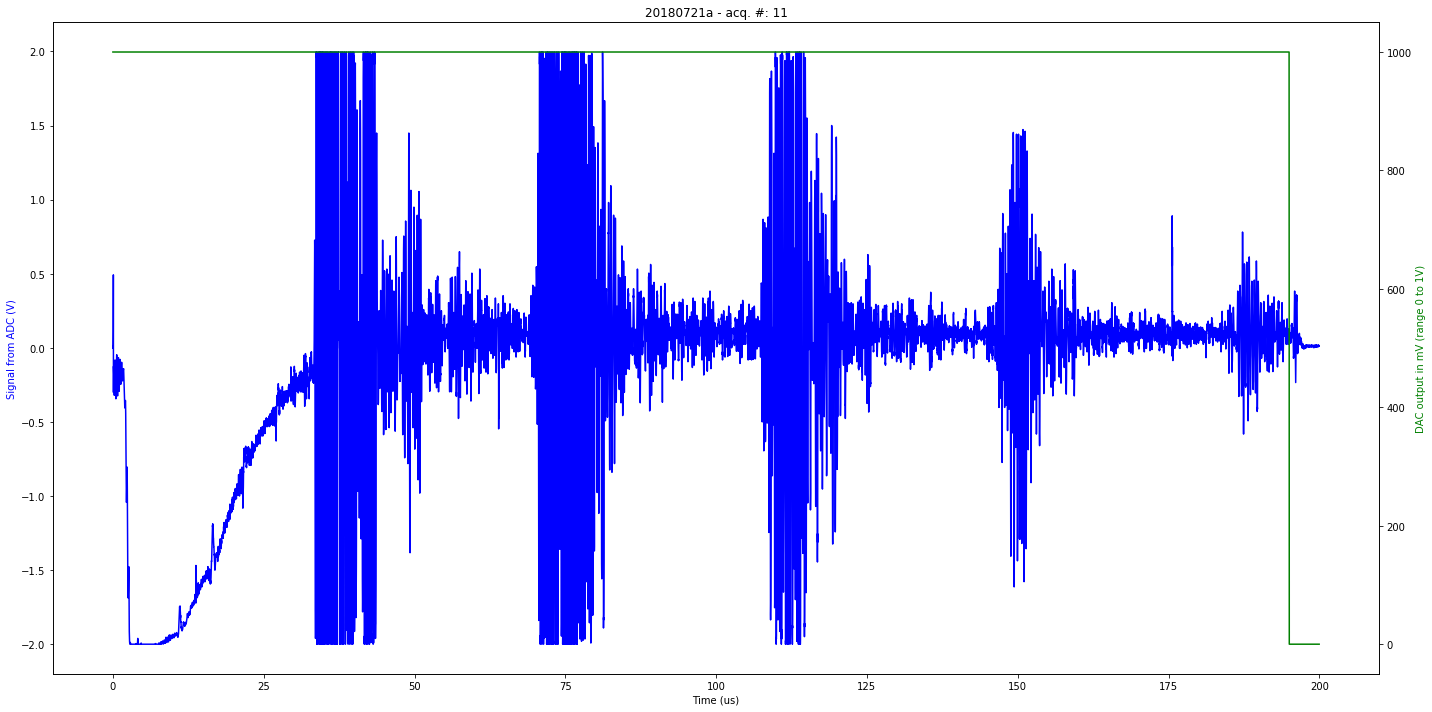

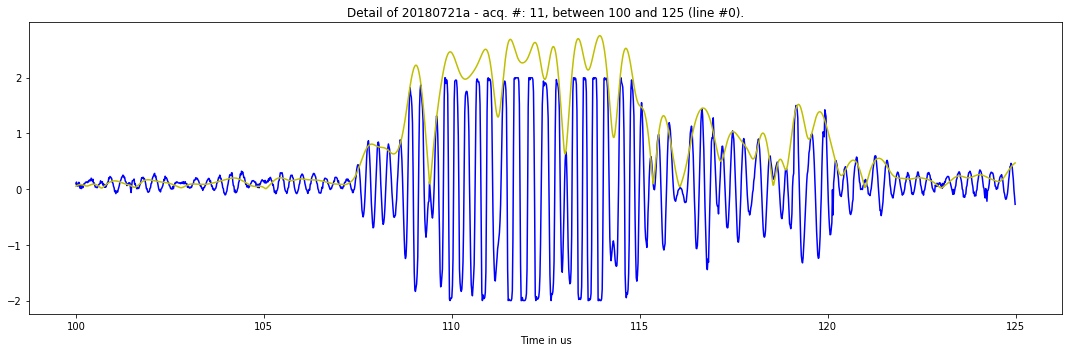

51
data/20180721a-6.json


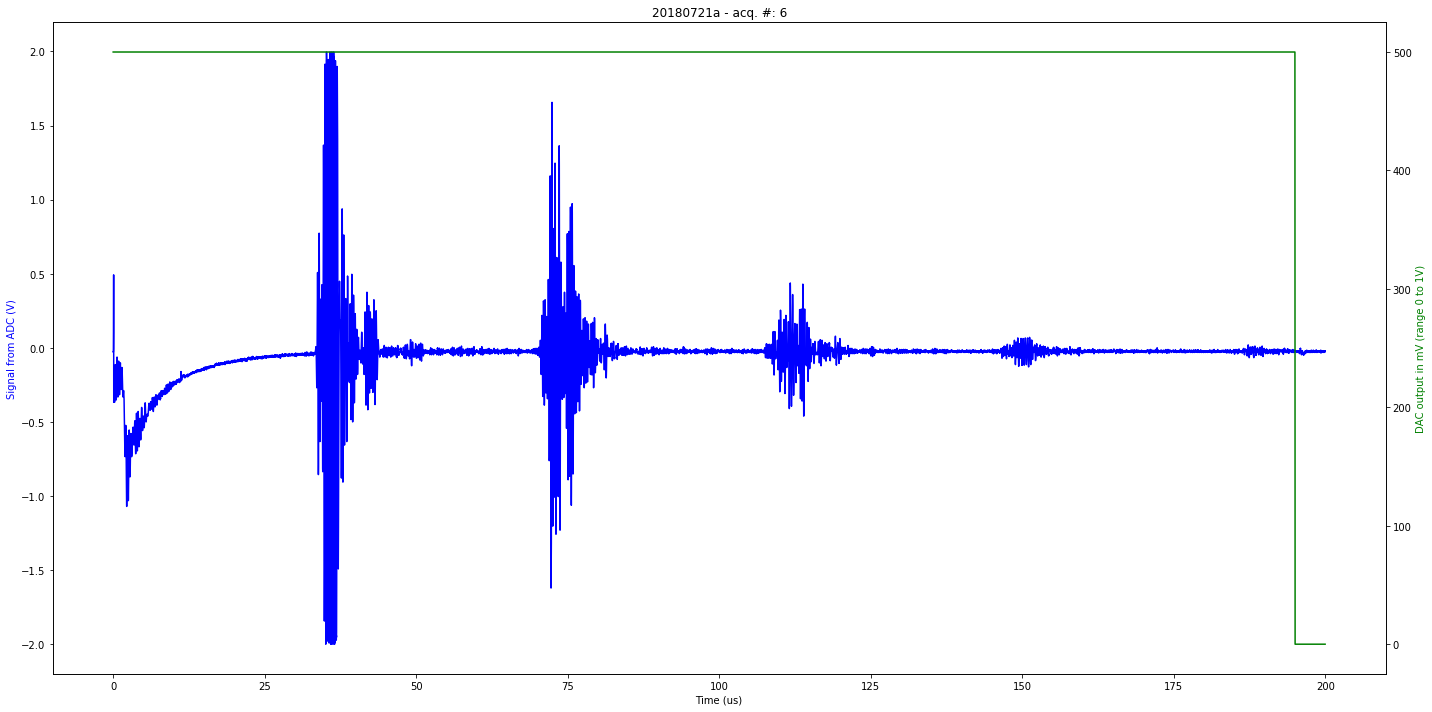

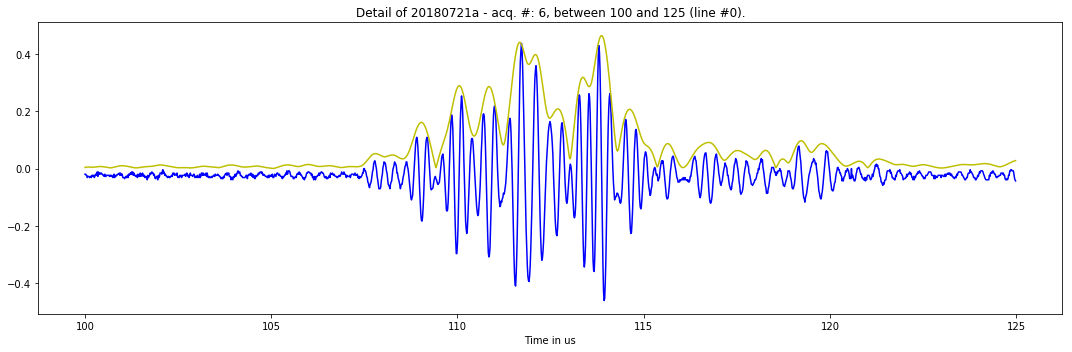

51
data/20180721a-9.json


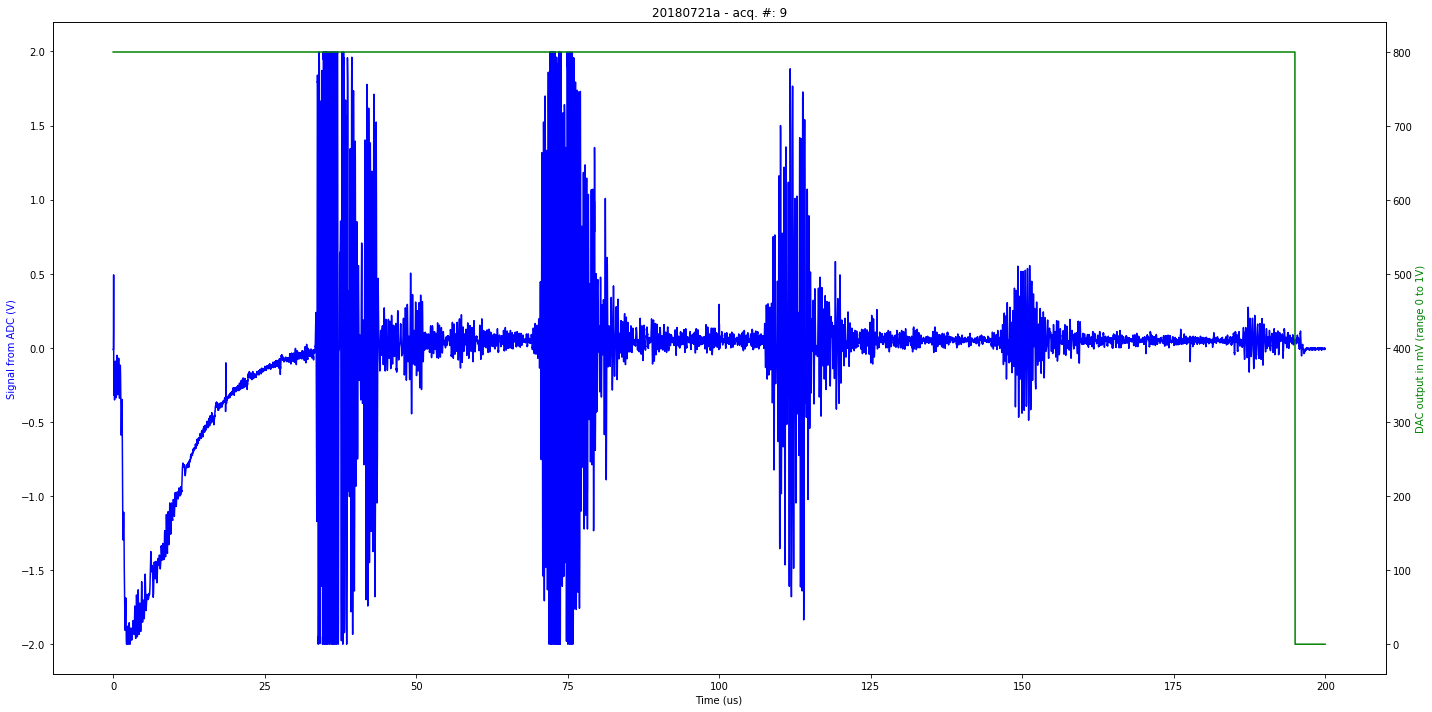

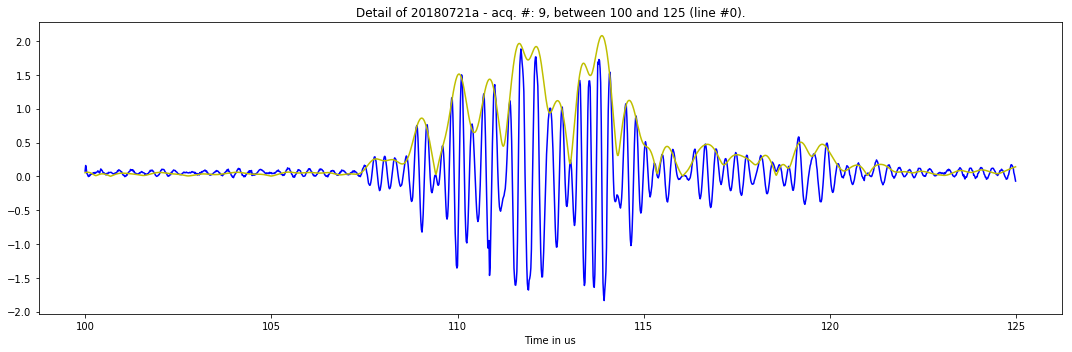

51
data/20180721a-5.json


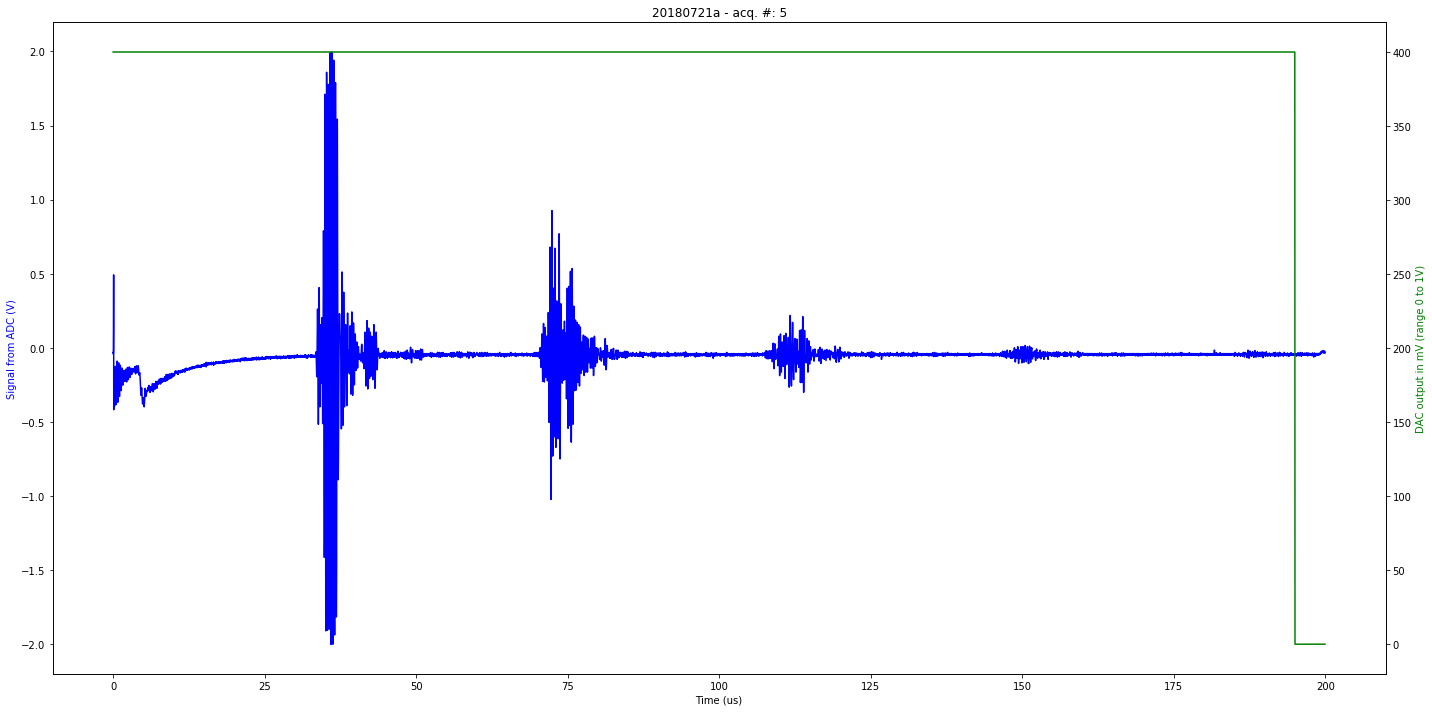

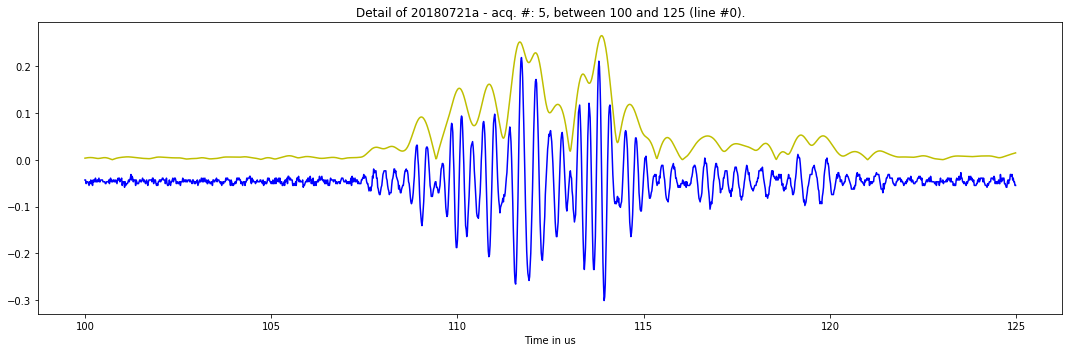

51
data/20180721a-4.json


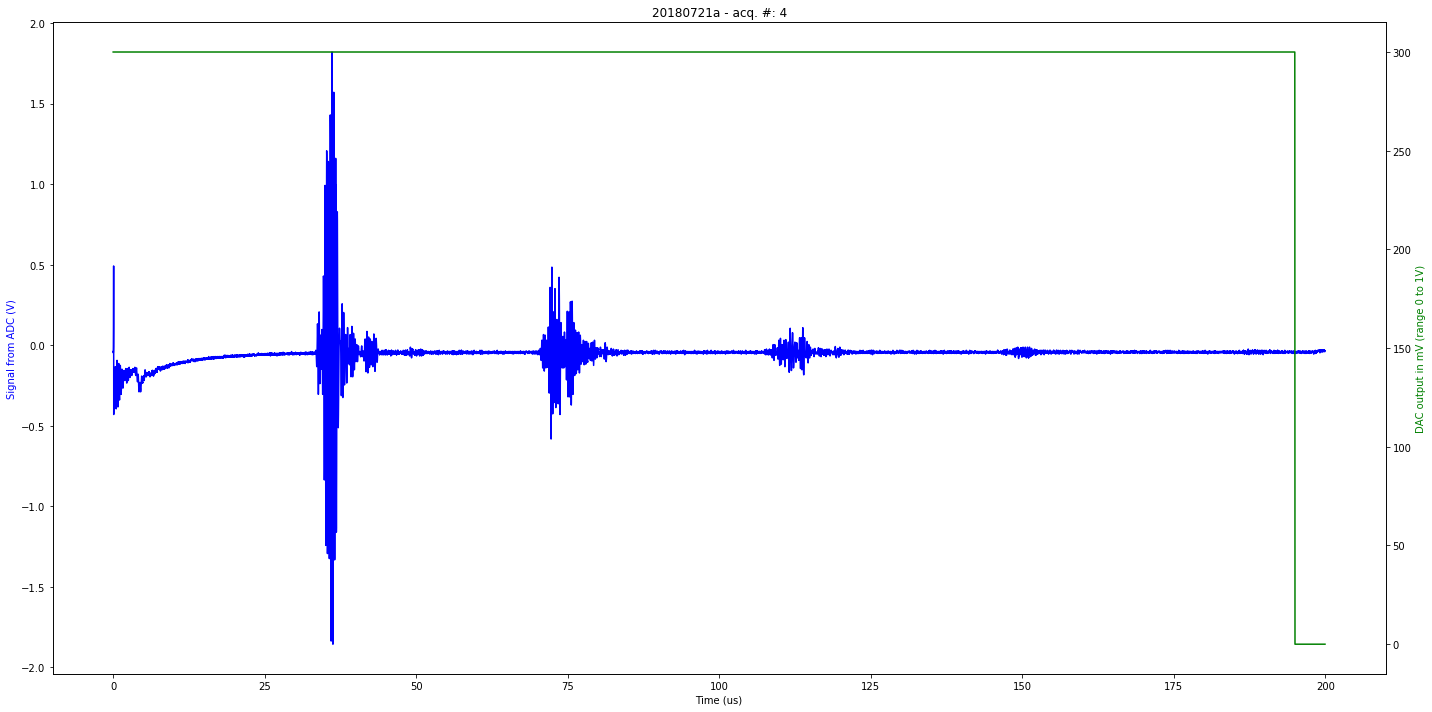

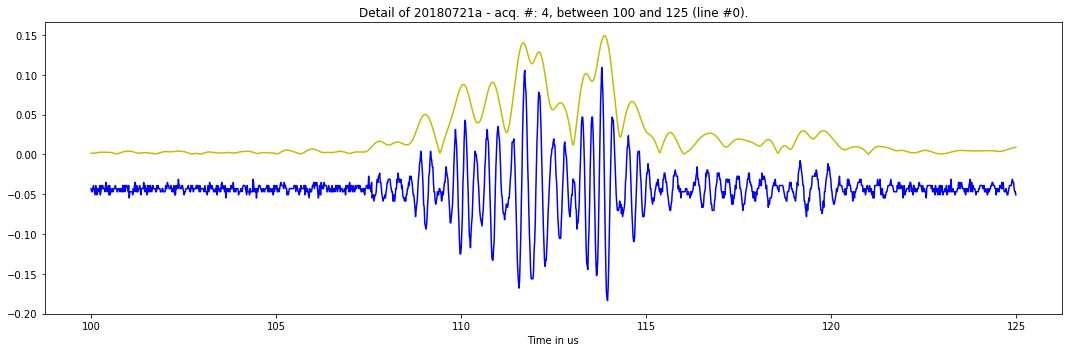

51
data/20180721a-12.json


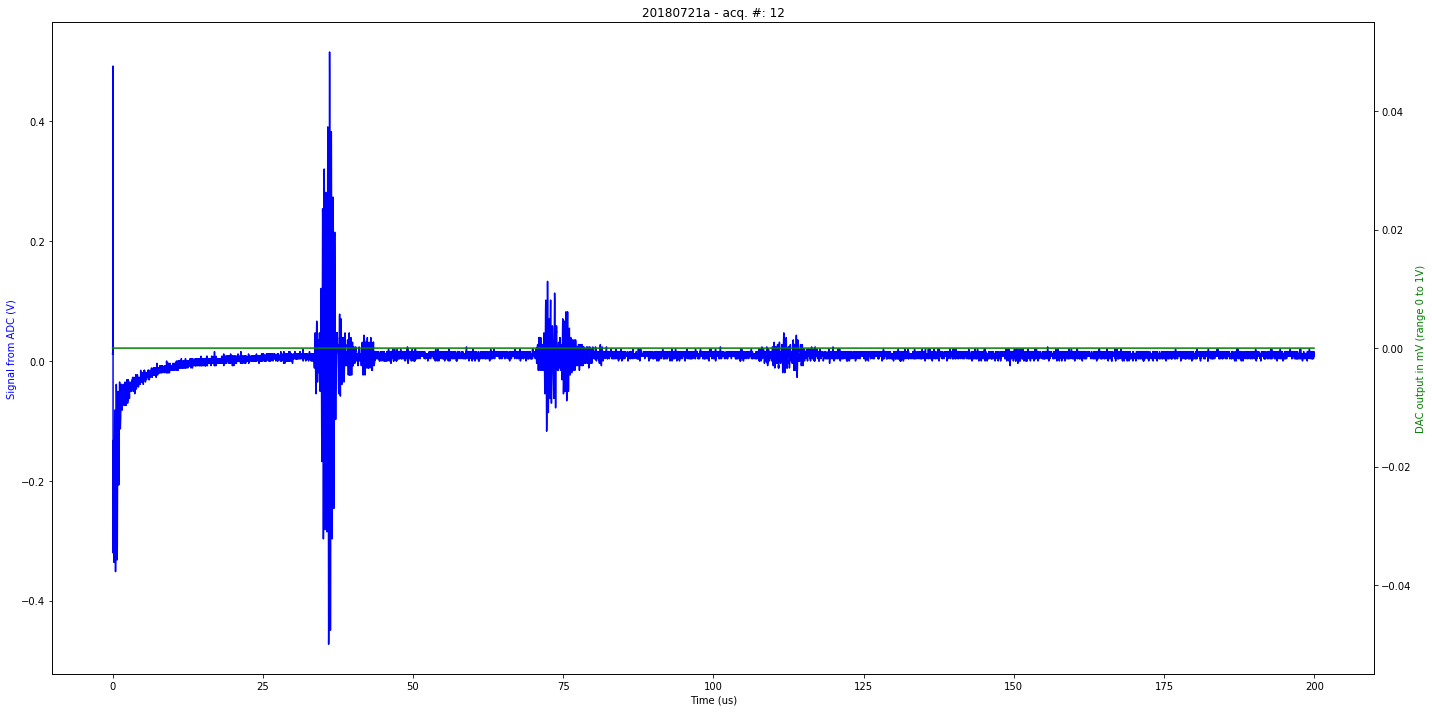

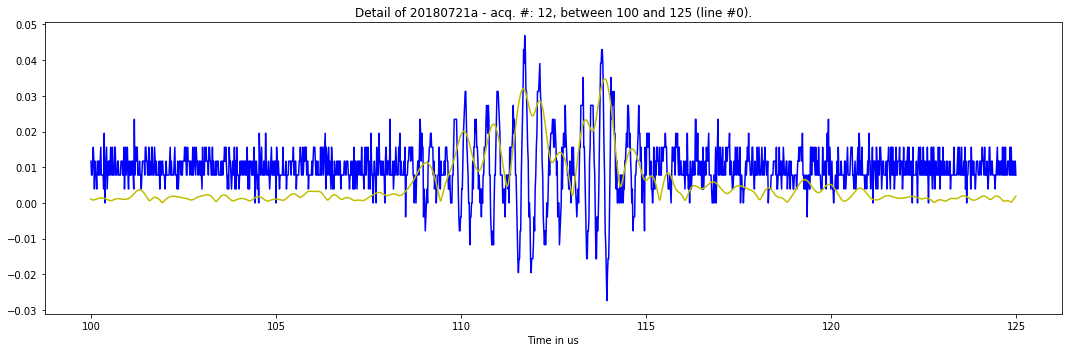

51
data/20180721a-8.json


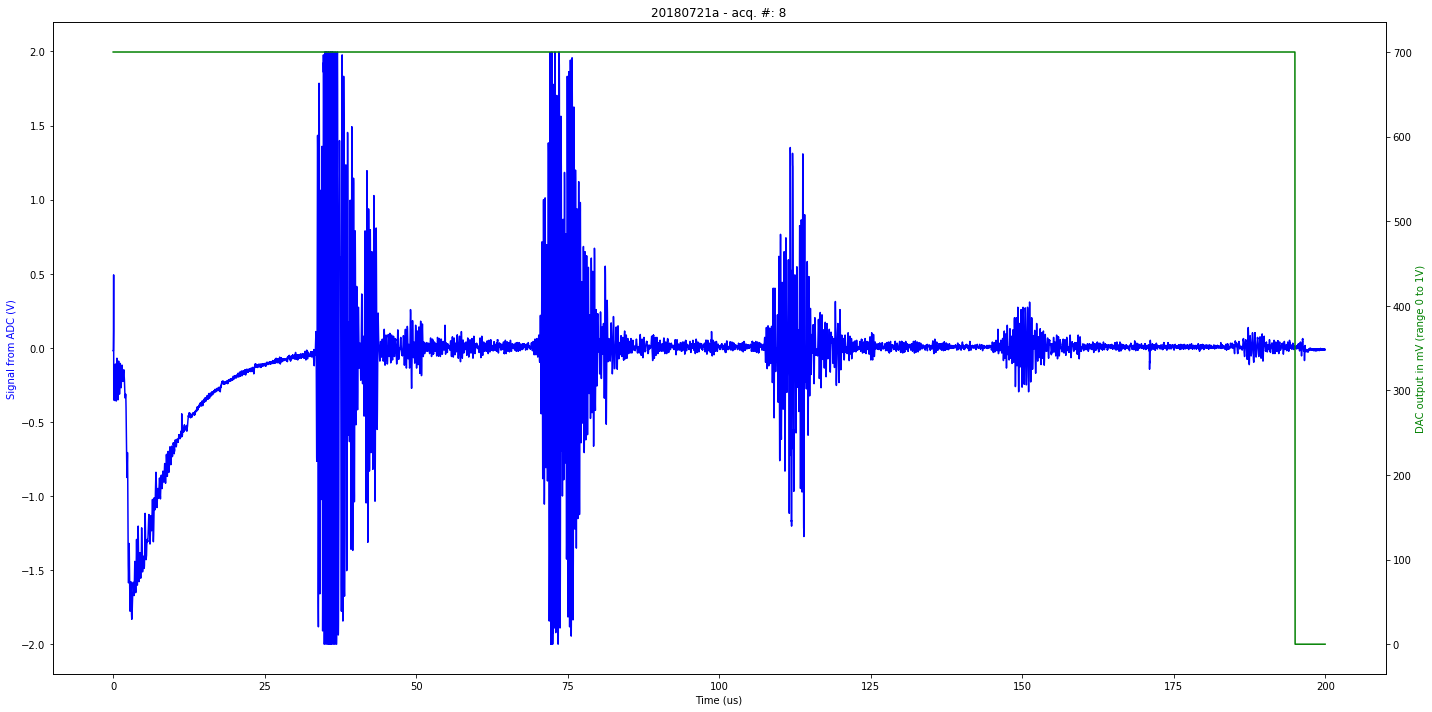

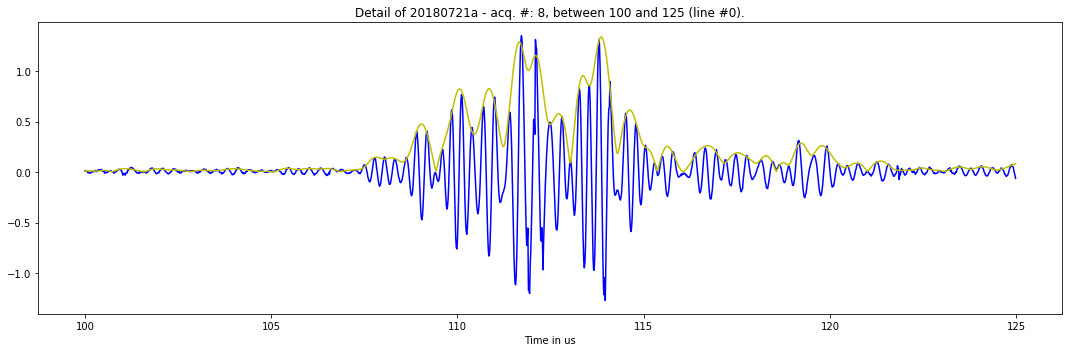

51
data/20180721a-10.json


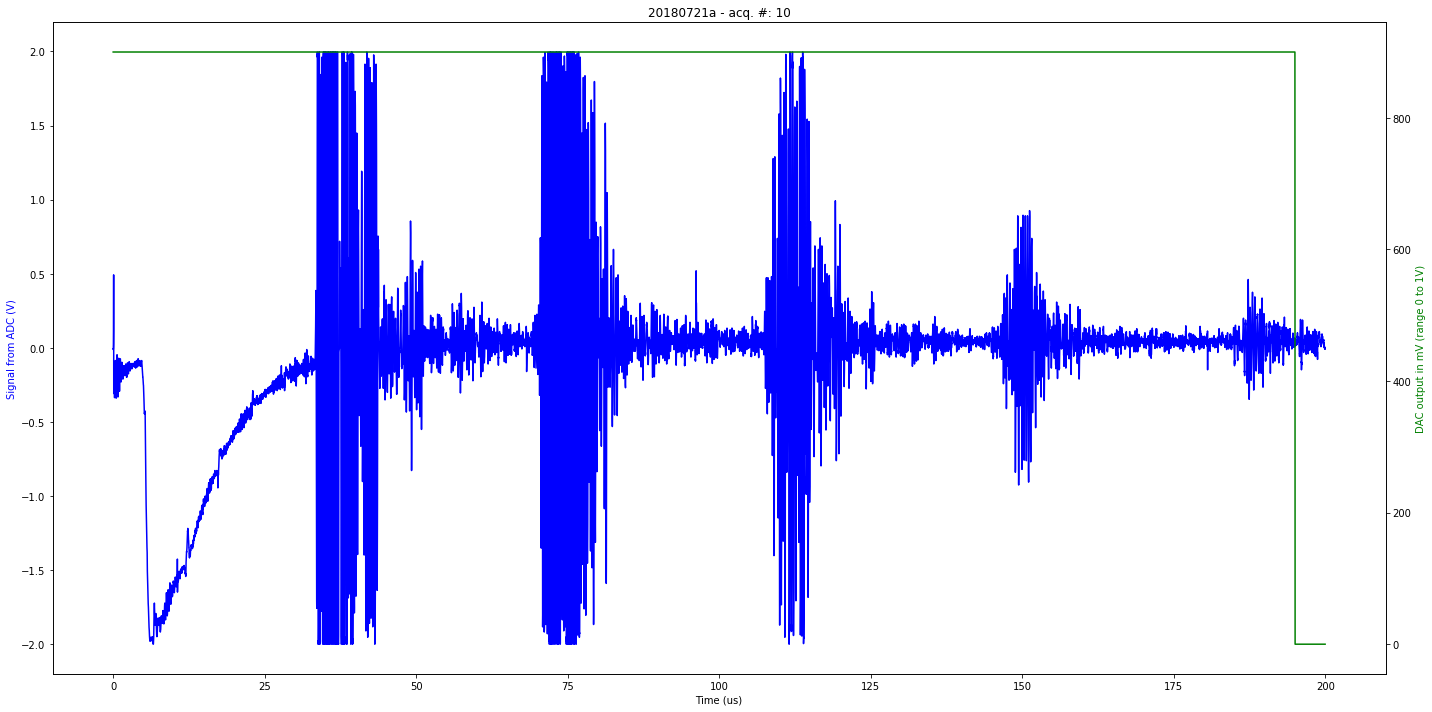

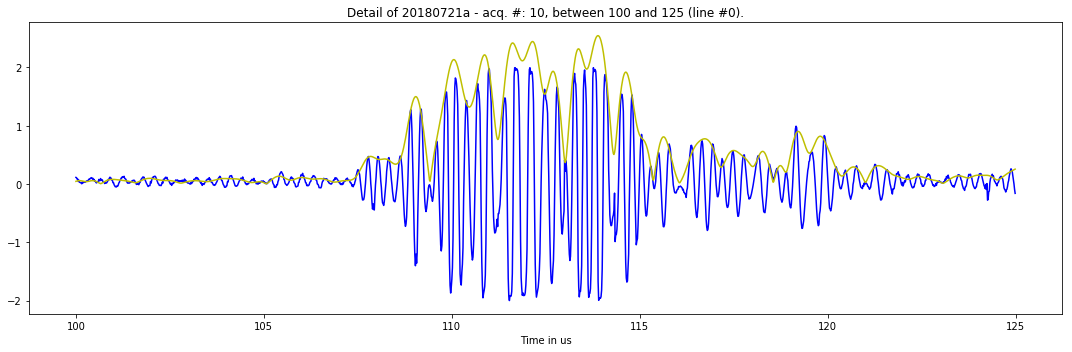

51


In [2]:
DataSet = {}

for data in glob.glob("data/*.json"):
    print data
    x = us_json()
    x.JSONprocessing(data)
    x.mkImg()
    x.PlotDetail(0,100,125)
    #x.SaveNPZ()
    print x.Nacq

# Let's compare two series, with two different gain values

In [3]:
x = us_json()
x.JSONprocessing("data/20180721a-1.json")
y = us_json()
y.JSONprocessing("data/20180721a-7.json")
print y

<pyUn0.us_json instance at 0x7ff828e79ef0>


In [4]:
A = 115
B = 122
Dist = [ np.linalg.norm(0.1*k*x.EnvHil[64*A:64*B]-y.EnvHil[64*A:64*B]) for k in range(500)]
Amp = np.argmin(Dist)*0.1
print Amp

23.2


### Fitting the good gain value

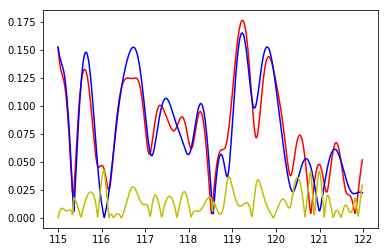

In [5]:
plt.plot(x.t[64*A:64*B],Amp*x.EnvHil[64*A:64*B],"r")
plt.plot(y.t[64*A:64*B],    y.EnvHil[64*A:64*B],"b")
plt.plot(y.t[64*A:64*B],abs(Amp*x.EnvHil[64*A:64*B]-y.EnvHil[64*A:64*B]),"y")
plt.show()

# Finding the gain relationship

AD8331: Gain ranges from 7.5dB to 55.5dB

In [6]:
TGC = {}

In [7]:
x = us_json()
x.JSONprocessing("data/20180721a-7.json")
x.tdac[3]
TGC[x.tdac[3]] = {}

for data in glob.glob("data/*.json"):
    #print data
    y=  us_json()
    y.JSONprocessing(data)
    A = 115
    B = 122
    Dist = [ np.linalg.norm(0.005*k*x.EnvHil[64*A:64*B]-y.EnvHil[64*A:64*B]) for k in range(6000)]
    Amp = np.argmin(Dist)*0.005
    TGC[x.tdac[3]][y.tdac[3]] = Amp
    print y.tdac[3],Amp

600.0 1.0
0.0 0.04
200.0 0.105
100.0 0.06
1000.0 9.42
500.0 0.585
800.0 3.08
400.0 0.33
300.0 0.185
0.0 0.04
700.0 1.71
900.0 5.41


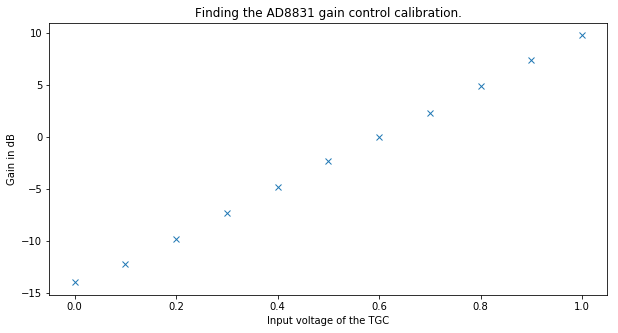

In [8]:
for i in TGC.keys():
    X = [x/1000.0 for x in TGC[i].keys()]
    Y = [TGC[i][k] for k in TGC[i].keys()]
    plt.figure(figsize=(10,5))
    #plt.semilogy(X,Y,"x")
    plt.plot(X,10.0*np.log10(Y),"x")
    plt.xlabel("Input voltage of the TGC")
    plt.ylabel("Gain in dB")
    Title = "Finding the AD8831 gain control calibration."
    plt.title(Title)
    ImagePath = "images/gain_comparison_to_"+str(i)+".jpg"
    plt.savefig(ImagePath)
    TagImage(ImagePath,"matty","20180721a","calibration",Title)
    plt.show()

## Let's check noise level check

In [9]:
noise = {}

In [10]:
A = 100
B = 105
for data in glob.glob("data/*.json"):
    #print data
    y=  us_json()
    y.JSONprocessing(data)
    npstd = np.std(y.tmp[64*A:64*B])
    noise[y.tdac[3]] = npstd
    print y.tdac[3],npstd

600.0 0.00869620544291
0.0 0.00343666413288
200.0 0.00344497907413
100.0 0.0033915122493
1000.0 0.0821853461908
500.0 0.00605743099937
800.0 0.0276836091832
400.0 0.0043617893766
300.0 0.00379196842097
0.0 0.00350269482955
700.0 0.0148713307383
900.0 0.0440806293391


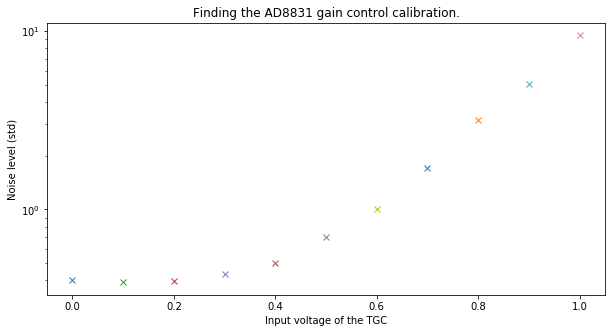

In [13]:
plt.figure(figsize=(10,5))
for i in noise.keys():
    xx = i/1000.0
    yy = noise[i]/noise[600]

    plt.semilogy(xx,yy,"x")
    #plt.plot(X,Y,"x")
plt.xlabel("Input voltage of the TGC")
plt.ylabel("Noise level (std)")
Title = "Finding the AD8831 gain control calibration."
plt.title(Title)
ImagePath = "images/gain_noise_comparison_to_"+str(600)+".jpg"
plt.savefig(ImagePath)
TagImage(ImagePath,"matty","20180721a","calibration",Title)
plt.show()